# Inference Time

In [41]:
import os
import numpy as np
import pickle as pkl

print(1, 0.0043)
drone_time = [[1, 0.0043]]
num_agents = [1,3]+list(2**np.arange(3, 10))
for prev_agent, agent in zip(num_agents[:-1], num_agents[1:]):
    time = os.path.getmtime(f'results/drone_v49_mixed_{agent}.pkl')-os.path.getmtime(f'results/drone_v49_mixed_{prev_agent}.pkl')
    with open(f'results/drone_v49_mixed_{agent}.pkl', 'rb') as f:
        result_dict = pkl.load(f)
        sum_len_paths = sum([len(p) for p in result_dict['paths']])
    print(agent, time / sum_len_paths)
    drone_time.append([agent, time / sum_len_paths])

1 0.0043
3 0.011687881989214046
8 0.021509205595651053
16 0.03764416012599858
32 0.07037833858401366
64 0.14910519529833377
128 0.3098100299909566
256 0.7900408053444608
512 1.920982608074798


In [50]:
print(1, 0.0037)
dubins_time = [[1, 0.0037]]
num_agents = [1,3]+list(2**np.arange(3, 10))
for prev_agent, agent in zip(num_agents[:-1], num_agents[1:]):
    time = os.path.getmtime(f'results/dubins_car_v125_mixed_{agent}.pkl')-os.path.getmtime(f'results/dubins_car_v125_mixed_{prev_agent}.pkl')
    with open(f'results/dubins_car_v125_mixed_{agent}.pkl', 'rb') as f:
        result_dict = pkl.load(f)
        sum_len_paths = sum([len(p) for p in result_dict['paths']])
    print(agent, time / sum_len_paths)
    dubins_time.append([agent, time / sum_len_paths])

1 0.0037
3 0.009332279722400494
8 0.011206051426395166
16 0.015084374191257433
32 0.021626273899108248
64 0.03522255855283205
128 0.0729298904023357
256 0.19013183152497704
512 0.5557261909348327


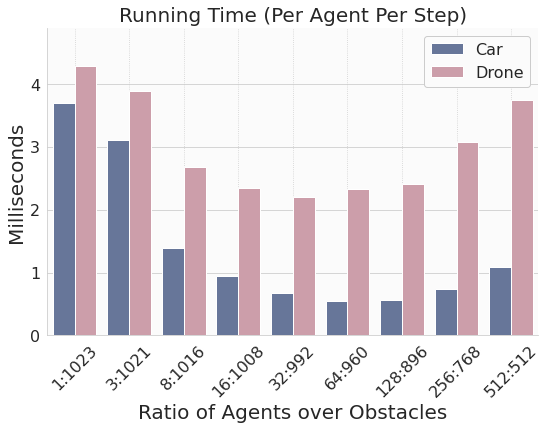

In [51]:
AXIS_LABEL_SIZE = 20
YAXIS_LABEL_SIZE = 20
TITLE_SIZE = 20
LEGEND_SIZE = 16
TICKS_SIZE = 16

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid", {"axes.facecolor": "0.985"})

import pandas as pd
# Initialize data to lists.
data = [{'density': d, 'time': 1000*t/d, 'environment': 'Car'} for d, t in dubins_time] + \
        [{'density': d, 'time': 1000*t/d, 'environment': 'Drone'} for d, t in drone_time]
# Creates DataFrame.
df = pd.DataFrame(data)

# Draw a nested barplot by species and sex
g = sns.catplot(
    data=df, kind="bar",
    x="density", y="time", hue="environment", legend=False,
    aspect=1.5,
    ci="sd", palette=sns.cubehelix_palette(start=2., rot=2, dark=0, light=0.8, gamma=1.8)[:2][::-1]
)

g.fig.get_axes()[0].legend(loc='upper right', bbox_to_anchor=(1.0, 1.0), fancybox=True, framealpha=1.,
                           shadow=False, fontsize=LEGEND_SIZE, facecolor=[0.985, 0.985, 0.985])
plt.tick_params(labelsize=TICKS_SIZE)

g.fig.gca().set_ylim(0, 4.9)

g.fig.gca().set_ylabel('Milliseconds', fontsize=AXIS_LABEL_SIZE)
g.fig.gca().set_xlabel('Ratio of Agents over Obstacles', fontsize=AXIS_LABEL_SIZE)

g.fig.gca().yaxis.grid(True)
g.fig.gca().xaxis.grid(True, linestyle=':')

# g.yaxis.grid(True)
# g.xaxis.grid(True, linestyle=':')

g.set_xticklabels(['{0:s}:{1:d}'.format(i, 1024-int(i)) for i in ['1','3','8','16','32','64','128','256','512']])
plt.xticks(rotation=45)
# plt.yscale('log')
sns.despine() 
plt.title('Running Time (Per Agent Per Step)', fontsize=TITLE_SIZE)

plt.savefig('results/plots/running_time.pdf', bbox_inches='tight') 


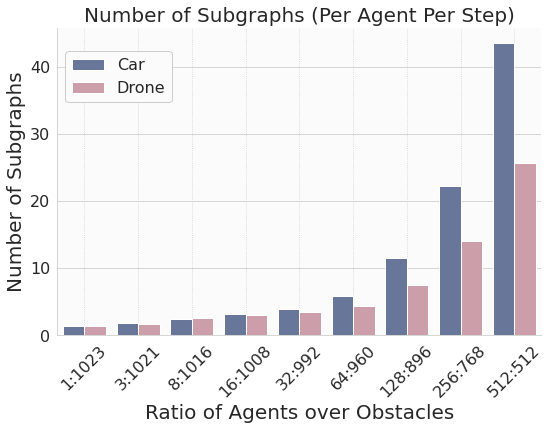

In [11]:
AXIS_LABEL_SIZE = 20
YAXIS_LABEL_SIZE = 20
TITLE_SIZE = 20
LEGEND_SIZE = 16
TICKS_SIZE = 16

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid", {"axes.facecolor": "0.985"})

import pandas as pd
df = sns.load_dataset("/subgraphs", data_home='./results')

# Draw a nested barplot by species and sex
g = sns.catplot(
    data=df, kind="bar",
    x="density", y="num_subgraph", hue="environment", legend=False,
    aspect=1.5, hue_order=['Car', 'Drone'],
    ci="sd", palette=sns.cubehelix_palette(start=2., rot=2, dark=0, light=0.8, gamma=1.8)[:2][::-1]
)

g.fig.get_axes()[0].legend(loc='upper left', bbox_to_anchor=(0., 0.95), fancybox=True, framealpha=1.,
                           shadow=False, fontsize=LEGEND_SIZE, facecolor=[0.985, 0.985, 0.985])
plt.tick_params(labelsize=TICKS_SIZE)

g.fig.gca().set_ylabel('Number of Subgraphs', fontsize=AXIS_LABEL_SIZE)
g.fig.gca().set_xlabel('Ratio of Agents over Obstacles', fontsize=AXIS_LABEL_SIZE)

g.fig.gca().yaxis.grid(True)
g.fig.gca().xaxis.grid(True, linestyle=':')

# g.yaxis.grid(True)
# g.xaxis.grid(True, linestyle=':')

g.set_xticklabels(['{0:s}:{1:d}'.format(i, 1024-int(i)) for i in ['1','3','8','16','32','64','128','256','512']])
plt.xticks(rotation=45)
# plt.yscale('log')
sns.despine() 
plt.title('Number of Subgraphs (Per Agent Per Step)', fontsize=TITLE_SIZE)

plt.savefig('results/plots/num_subgraph.pdf', bbox_inches='tight') 